<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-cde2b820db8c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Iteration 1: norm_delta = 2.40e+00, step_size = 0.9500, log_lik = -15653.03964, newton_decrement = 2.32e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.68e+00, step_size = 0.9500, log_lik = -13337.92167, newton_decrement = 4.69e+02, seconds_since_start = 0.0
Iteration 3: norm_delta = 9.90e-01, step_size = 0.9500, log_lik = -12806.44214, newton_decrement = 1.16e+02, seconds_since_start = 0.1
Iteration 4: norm_delta = 3.71e-01, step_size = 1.0000, log_lik = -12671.78404, newton_decrement = 1.12e+01, seconds_since_start = 0.1
Iteration 5: norm_delta = 4.72e-02, step_size = 1.0000, log_lik = -12659.85666, newton_decrement = 1.61e-01, seconds_since_start = 0.2
Iteration 6: norm_delta = 1.04e-03, step_size = 1.0000, log_lik = -12659.69298, newton_decrement = 8.32e-05, seconds_since_start = 0.2
Iteration 7: norm_delta = 6.23e-07, step_size = 1.0000, log_lik = -12659.69290, newton_decrement = 3.18e-11, seconds_since_start = 0.3
Convergence success after 7 iterations.


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2025-02-04 07:28:28 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
gender                                -0.04      0.96      0.05           -0.13            0.05                0.88                1.05
SeniorCitizen                          0.03      1.04      0.06           -0.08            0.15                0.93                1.16
Partner                               -0.18      0.84      0.06           -0.29           -0.07                0.75                0.93
Dependents                            -0.09      0.91      0.07           -0.23            0.05                0.80                1.05
PhoneService                           0.87      2.39      0.53           -0.17            1.91                0.85                6.75
MultipleLines                          0.04      1.04      0.06           -0.08            0.17                0.92                1.18
OnlineSecurity                        -0.11      0.90      0.07           -0.24            0.02                0.79                1.02
OnlineBackup                          -0.03      0.97      0.06           -0.15            0.10                0.86                1.10
DeviceProtection                       0.04      1.04      0.06           -0.08            0.17                0.92                1.18
TechSupport                           -0.04      0.96      0.07           -0.17            0.09                0.84                1.09
StreamingTV                            0.14      1.15      0.12           -0.09            0.37                0.91                1.45
StreamingMovies                        0.14      1.15      0.12           -0.09            0.37                0.92                1.45
PaperlessBilling                       0.15      1.16      0.06            0.04            0.26                1.04                1.30
MonthlyCharges                         0.01      1.01      0.02           -0.03            0.06                0.97                1.06
TotalCharges                          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
InternetService_Fiber optic            1.02      2.77      0.58           -0.12            2.15                0.89                8.59
InternetService_No                    -2.49      0.08      1.05           -4.54           -0.44                0.01                0.64
Contract_One year                     -1.27      0.28      0.10           -1.46           -1.07                0.23                0.34
Contract_Two year                     -3.70      0.02      0.20           -4.10           -3.31                0.02                0.04
PaymentMethod_Credit card (automatic) -0.01      0.99      0.09           -0.19            0.17                0.83                1.18
PaymentMethod_Electronic check         0.39      1.47      0.07            0.24            0.53                1.28                1.70
PaymentMethod_Mailed check             0.51      1.67      0.09            0.34            0.68                1.40                1.98

                                       cmp to      z      p  -log2(p)
covariate                                                            
gender                                   0.00  -0.85   0.40      1.33
SeniorCitizen                            0.00   0.61   0.54      0.88
Partner                                  0.00  -3.23 <0.005      9.67
Dependents          

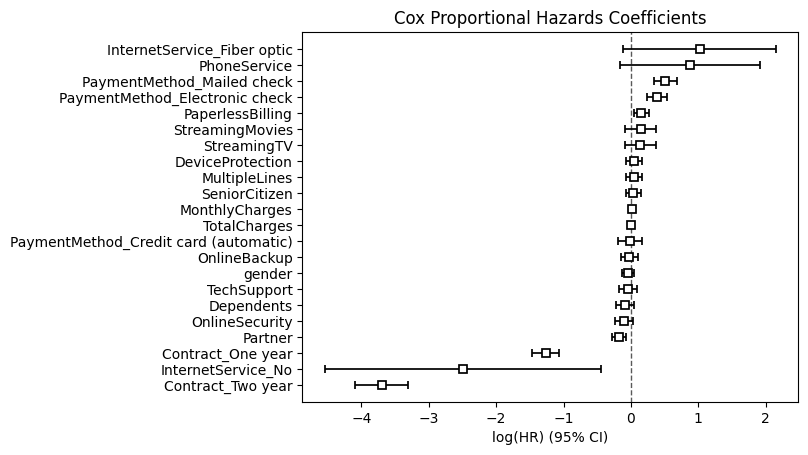

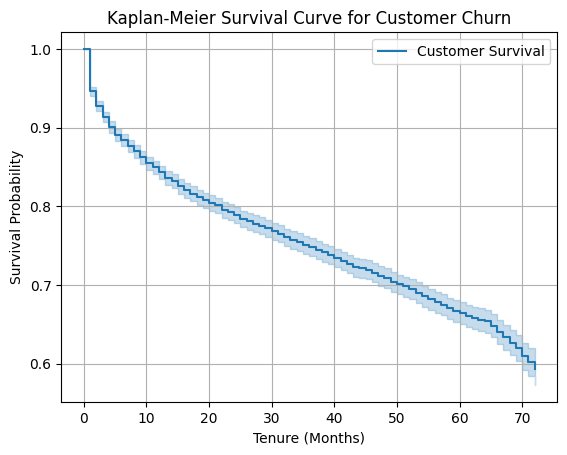

In [ ]:
mport pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from lifelines import CoxPHFitter

# Load the dataset (update the file path as needed)
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric (handle non-numeric entries) and fill missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Map the target variable to binary: 0 for 'No' and 1 for 'Yes'
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Drop customerID as it's not useful for modeling
data.drop('customerID', axis=1, inplace=True)

# Label encode binary categorical columns
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# One-hot encode columns with more than two categories
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# For the Cox model:
# - 'tenure' is used as the duration (time variable)
# - 'Churn' is used as the event indicator (1 if churn occurred)
# All other columns will be used as covariates.

# Initialize and fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='tenure', event_col='Churn', show_progress=True)

# Print a summary of the Cox model results
cph.print_summary()

# Plot the coefficients to see the impact of each variable on the hazard
cph.plot()
plt.title("Cox Proportional Hazards Coefficients")
plt.show()

# Initialize and fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label='Customer Survival')

# Plot the Kaplan-Meier survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Customer Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()
